# **Mean Shift Custering Model Theory**


## Mean Shift Clustering

---

## Theory
Mean Shift Clustering is a non-parametric, unsupervised machine learning algorithm used to identify clusters in a dataset by locating the modes (high-density regions) of the data distribution. Unlike K-Means, it does not require the number of clusters to be specified in advance. Instead, it iteratively shifts data points towards the densest regions (modes) until convergence. It is widely used in image segmentation, object tracking, and clustering tasks with irregularly shaped clusters.

The main idea is to:
- Define a kernel (e.g., Gaussian) to estimate the density of data points.
- Shift data points towards the densest regions (modes) iteratively.
- Merge points that converge to the same mode into a single cluster.

---

## Mathematical Foundation
- **Kernel Density Estimation**:
  The density at a point \( x \) is estimated using a kernel function \( K \) and bandwidth \( h \):
  $$ f(x) = \frac{1}{n h^d} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right) $$
  - \( n \): Number of data points.
  - \( d \): Dimensionality of the data.
  - \( h \): Bandwidth parameter (controls the size of the kernel).

- **Gaussian Kernel**:
  $$ K(x) = \exp\left(-\frac{\|x\|^2}{2}\right) $$

- **Mean Shift Vector**:
  The vector that shifts a point \( x \) towards the densest region is computed as:
  $$ m(x) = \frac{\sum_{i=1}^{n} x_i K\left(\frac{x - x_i}{h}\right)}{\sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)} - x $$

- **Mean Shift Algorithm**:
  1. Initialize each data point as a cluster center.
  2. Compute the mean shift vector \( m(x) \) for each point.
  3. Update the point's position: \( x \leftarrow x + m(x) \).
  4. Repeat until convergence (when \( m(x) \) becomes small).

---

## Algorithm Steps
1. **Initialization**:
   - Choose the bandwidth parameter \( h \).
   - Initialize each data point as a cluster center.

2. **Mean Shift Iteration**:
   - For each point, compute the mean shift vector \( m(x) \) using the kernel density estimate.
   - Update the point's position by shifting it towards the densest region.

3. **Convergence**:
   - Repeat the mean shift iteration until the points stop moving significantly.

4. **Cluster Assignment**:
   - Merge points that converge to the same mode into a single cluster.

---

## Key Parameters
- **bandwidth**: The bandwidth parameter \( h \) (controls the size of the kernel).
- **bin_seeding**: Whether to use bin seeding to speed up initialization.
- **min_bin_freq**: Minimum frequency of points in a bin to be used as a seed.

---

## Advantages
- Does not require the number of clusters to be specified.
- Can identify clusters of arbitrary shapes.
- Robust to outliers and noise.
- Works well with irregularly shaped clusters.

---

## Disadvantages
- Computationally expensive for large datasets (\( O(n^2) \) for naive implementations).
- Sensitive to the choice of bandwidth \( h \).
- Struggles with high-dimensional data.
- Requires careful parameter tuning.

---

## Implementation Tips
- Use **k-nearest neighbors (KNN)** to estimate an appropriate bandwidth \( h \).
- Use **bin seeding** to speed up the algorithm for large datasets.
- Scale features before clustering to ensure equal contribution from all features.
- Consider dimensionality reduction (e.g., PCA) for high-dimensional data.

---

## Applications
- Image segmentation
- Object tracking in computer vision
- Customer segmentation
- Anomaly detection
- Clustering in bioinformatics

Mean Shift Clustering is a powerful and flexible algorithm for identifying clusters in datasets with irregular shapes and varying densities. While it requires careful tuning of the bandwidth parameter, it is a valuable tool for many real-world applications.

## Model Evaluation for Mean Shift Clustering

---

### 1. Silhouette Score
**Formula:**
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$
**Description:**
- Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate well-separated clusters.
- Values close to 0 indicate overlapping clusters.
- Negative values suggest incorrect clustering.

---

### 2. Davies-Bouldin Index
**Formula:**
$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$
**Description:**
- Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
- Lower values indicate better clustering.

**Interpretation:**
- Values closer to 0 indicate better-defined clusters.
- Sensitive to the number of clusters and their separation.

---

### 3. Calinski-Harabasz Index
**Formula:**
$$
\text{CHI} = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$
**Description:**
- Measures the ratio of between-cluster dispersion to within-cluster dispersion.
- Higher values indicate better-defined clusters.

**Interpretation:**
- Higher values indicate better clustering.
- Useful for comparing different parameter settings.

---

### 4. Rand Index
**Formula:**
$$
\text{Rand Index} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
**Description:**
- Measures the similarity between two clusterings by counting pairs of points that are assigned to the same or different clusters in both clusterings.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect agreement.
- Requires ground truth labels for evaluation.

---

### 5. Adjusted Rand Index (ARI)
**Formula:**
$$
\text{ARI} = \frac{\text{Rand Index} - \text{Expected Rand Index}}{\max(\text{Rand Index}) - \text{Expected Rand Index}}
$$
**Description:**
- Adjusted version of the Rand Index that accounts for chance agreement.
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate strong agreement.
- Values close to 0 or negative indicate random or poor clustering.

---

### 6. Homogeneity, Completeness, and V-Measure
**Formulas:**
- **Homogeneity:**  
  $$
  h = 1 - \frac{H(C|K)}{H(C)}
  $$
- **Completeness:**  
  $$
  c = 1 - \frac{H(K|C)}{H(K)}
  $$
- **V-Measure:**  
  $$
  v = 2 \cdot \frac{h \cdot c}{h + c}
  $$

**Description:**
- **Homogeneity:** Measures if each cluster contains only members of a single class.
- **Completeness:** Measures if all members of a given class are assigned to the same cluster.
- **V-Measure:** Harmonic mean of homogeneity and completeness.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect clustering.
- Requires ground truth labels for evaluation.

---

### 7. Bandwidth Sensitivity Analysis
**Description:**
- Evaluates the impact of the bandwidth parameter on clustering results.
- Bandwidth determines the size of the region (kernel) used to compute the mean shift.

**Interpretation:**
- Smaller bandwidth values may result in more clusters.
- Larger bandwidth values may result in fewer clusters.
- Optimal bandwidth balances cluster granularity and overfitting.

---

### 8. Cluster Stability
**Description:**
- Measures the consistency of clustering results across different subsamples of the data.
- Evaluated using techniques like bootstrapping or cross-validation.

**Interpretation:**
- Higher stability indicates more reliable clustering.
- Useful for assessing the robustness of Mean Shift.

---

### 9. Number of Clusters
**Description:**
- Mean Shift automatically determines the number of clusters based on the data density.
- Evaluates the appropriateness of the number of clusters identified.

**Interpretation:**
- Too many clusters may indicate overfitting.
- Too few clusters may indicate underfitting.
- Compare with domain knowledge or ground truth (if available).

---

### 10. Density Visualization
**Description:**
- Visualizes the density of data points and the identified cluster centers.
- Helps understand how well the clusters align with high-density regions.

**Interpretation:**
- Cluster centers should align with peaks in the density plot.
- Sparse regions may indicate noise or outliers.

---

## sklearn template [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

### class MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)

| **Parameter**               | **Description**                                                                                                                                     | **Default**      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|------------------|
| `bandwidth`                | Bandwidth used in the RBF kernel (if None, it is estimated using `estimate_bandwidth`)                                                             | `None`           |
| `seeds`                    | Seeds used to initialize kernels (if None, seeds are generated using `get_bin_seeds`)                                                             | `None`           |
| `bin_seeding`              | If True, initial kernel locations are discretized into a grid                                                                                      | `False`          |
| `min_bin_freq`             | Minimum number of points in a bin to be used as a seed                                                                                             | `1`              |
| `cluster_all`              | If True, all points are assigned to clusters; otherwise, outliers are labeled as `-1`                                                              | `True`           |
| `n_jobs`                   | Number of parallel jobs to run for neighbor search                                                                                                 | `None`           |
| `max_iter`                 | Maximum number of iterations during mean shift optimization                                                                                        | `300`            |

-

| **Attribute**              | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `cluster_centers_`         | Coordinates of cluster centers                                                                                                                      |
| `labels_`                  | Labels of each point                                                                                                                                |
| `n_iter_`                  | Number of iterations performed                                                                                                                      |
| `n_features_in_`           | Number of features seen during fit                                                                                                                  |

-

| **Method**                 | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `fit(X)`                   | Perform mean shift clustering on the data                                                                                                          |
| `fit_predict(X)`           | Perform mean shift clustering and return cluster labels                                                                                            |
| `predict(X)`               | Predict the closest cluster for each sample in X                                                                                                   |
| `get_params()`             | Get parameters for this estimator                                                                                                                   |
| `set_params()`             | Set the parameters of this estimator                                                                                                                |

# Mean Shift Custering - Example

## Data loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target variable (for comparison, not used in clustering)

# Display the first few rows of the dataset
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
dtype: int64


##  Data processing

In [3]:
# Standardize the features (Mean Shift is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier plotting
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# Display the first few rows of the scaled data
print("Scaled Features:")
print(X_scaled.head())

Scaled Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Plotting data

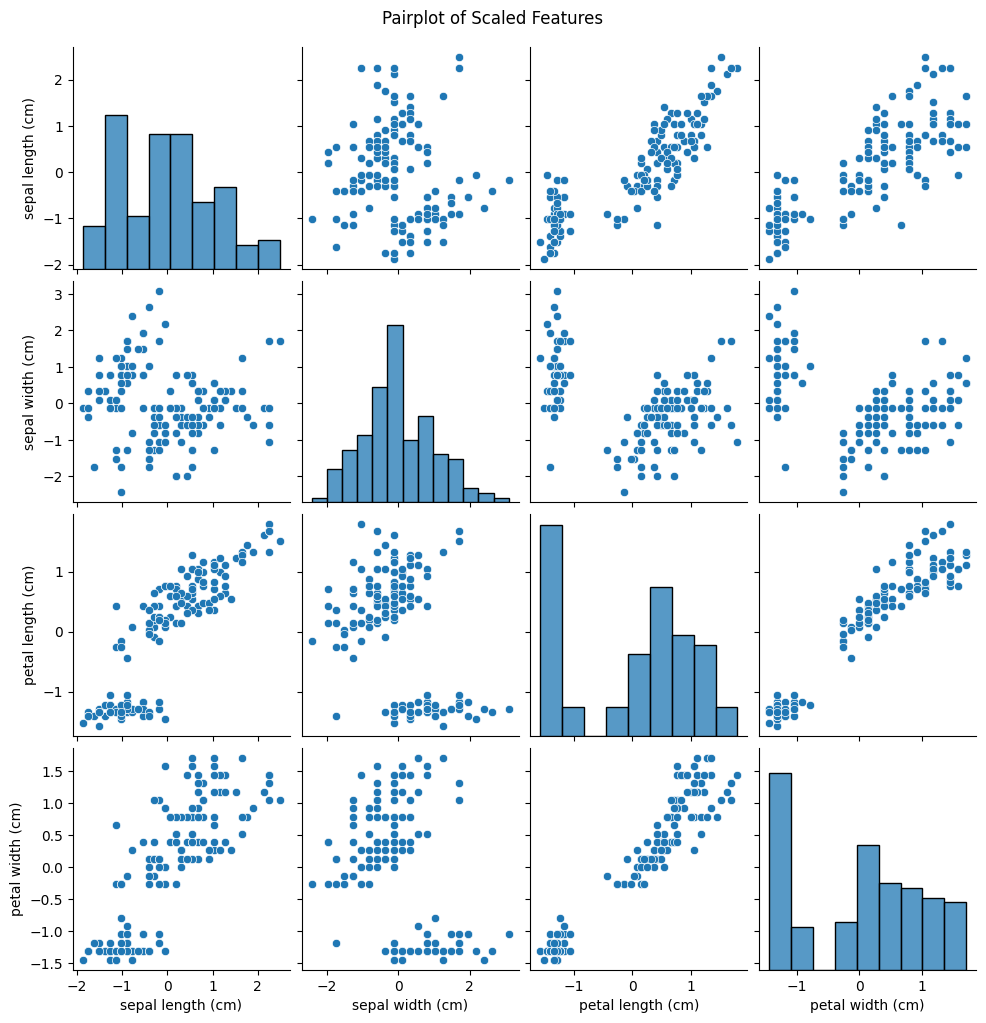

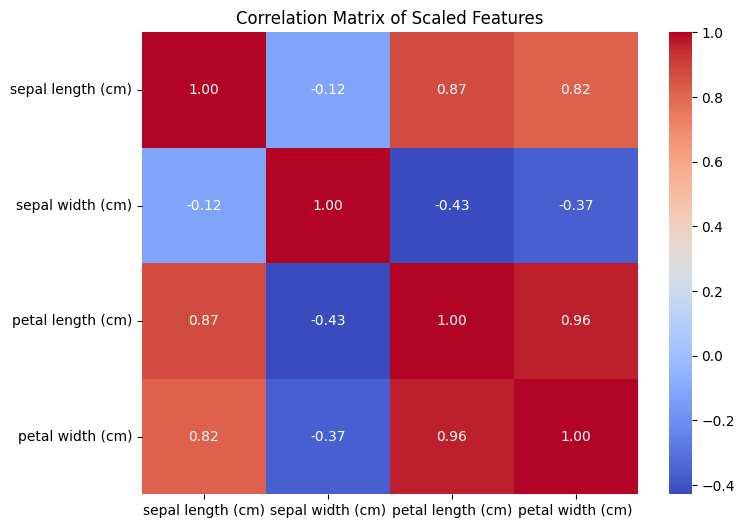

In [4]:
# Plot the distribution of features
sns.pairplot(X_scaled)
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Scaled Features")
plt.show()

## Model definition

In [5]:
# Define the Mean Shift model
mean_shift = MeanShift(bandwidth=2)  # Adjust bandwidth as needed

# Fit the model to the scaled data
mean_shift.fit(X_scaled)

# Get the cluster labels
cluster_labels = mean_shift.labels_

# Add cluster labels to the original dataset for visualization
X['Cluster'] = cluster_labels
print("Cluster Labels:")
print(X.head())

# Number of clusters
n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")

Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
Number of clusters: 2


## Model evaulation

Silhouette Score: 0.5818


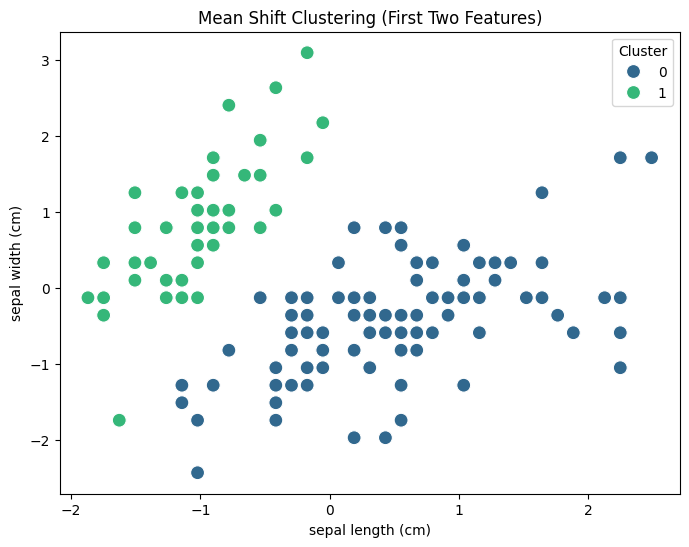

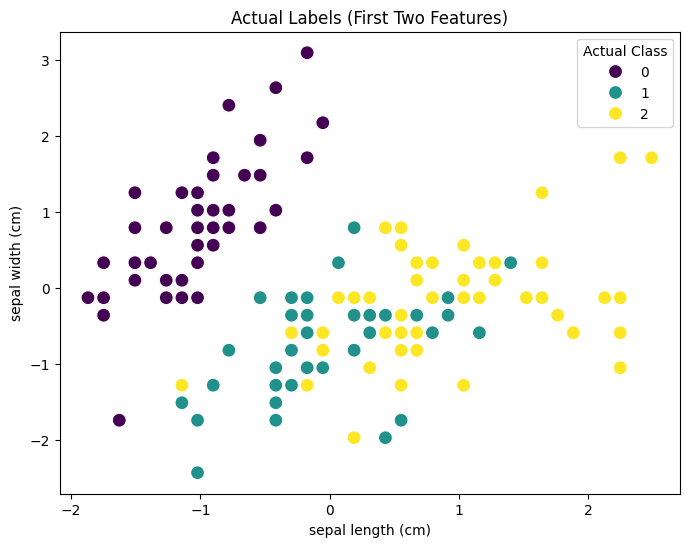

In [6]:
# Evaluate the clustering using Silhouette Score (if more than one cluster)
if n_clusters > 1:  # Silhouette Score requires at least 2 clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed with only one cluster.")

# Plot the clusters (using the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title("Mean Shift Clustering (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Compare clusters with actual labels (for visualization purposes only)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=y, palette='viridis', s=100)
plt.title("Actual Labels (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Actual Class')
plt.show()